<a href="https://colab.research.google.com/github/AlkaidCheng/GSOC_MLHEP/blob/master/New_Features_Walkthrough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#install dependencies
!pip install quple

# Circuit Descriptors
- find the variance of gradients of a particular symbol in a circuit
- sample final states of a circuit with symbols filled with random values
- sample density matrices of circuit qubits with symbols filled with random values
- calculate the Meyer Wallach measure of a state
- calculate the von Neumann entropy of PQC
- calculate the entangling measure of PQC
- calculate the expressibility measure of PQC
- Plotting the fidelity pdf of PQC and Haar

Reference: https://arxiv.org/pdf/1905.10876.pdf

In [2]:
import quple
import cirq
from quple.trial_wavefunction.real_amplitudes import RealAmplitudes
# define a PQC
n_qubit = 5
# define a parameterised circuit
cq = RealAmplitudes(n_qubit)

## Gradient Variance Test

This is inspired from https://www.tensorflow.org/quantum/tutorials/barren_plateaus

In [3]:
# define a measurement
qubits = cq.qubits
op = cirq.Z(qubits[0]) * cirq.Z(qubits[1])

In [4]:
# Do the gradient variance test
quple.gradient_variance_test([cq]*200, op)

0.32998112

## Sample Circuit Qubit Final States

In [5]:
final_states = quple.sample_final_states(cq, samples=200)
final_states

Instructions for updating:
reduction_indices is deprecated, use axis instead


[array([-0.01168999-4.42332793e-09j,  0.38703126+4.44122605e-08j,
        -0.41077477-9.12626632e-08j,  0.0874907 +8.56007532e-08j,
        -0.20845401-5.65852680e-08j,  0.04457478+3.58289789e-08j,
        -0.01375727-4.53721221e-08j,  0.4616689 +1.77103288e-07j,
        -0.05039398+8.71727401e-09j,  0.01082993-6.06547701e-10j,
        -0.00571981-1.79671495e-08j,  0.19276313+7.62072006e-08j,
        -0.01071166-4.58348808e-08j,  0.35367873+1.51682315e-07j,
        -0.41908556-2.16129862e-07j,  0.08923344+1.38741498e-07j,
         0.02838836+3.57160035e-09j, -0.00608906+2.45516940e-11j,
         0.00270065+8.74588046e-09j, -0.09091107-4.09279792e-08j,
         0.00431645+1.86122442e-08j, -0.14257649-6.82240184e-08j,
         0.16642475+9.73848628e-08j, -0.03543726-5.99875065e-08j,
        -0.00121657-5.11048093e-09j,  0.04032861+2.22881198e-08j,
        -0.0405009 -2.91579418e-08j,  0.00862771+1.30317375e-08j,
        -0.0290985 -1.88962979e-08j,  0.00621944+1.19656560e-08j,
        -0

# Sample Circuit Qubit Density Matrices

In [6]:
density_matrices = quple.sample_density_matrices(cq, samples=200)
density_matrices

[array([[ 6.1285355e-05+0.0000000e+00j, -7.6023547e-04+3.9059262e-09j,
         -1.0361808e-03+5.2952447e-09j, ...,
          2.1764897e-03-1.2349828e-08j, -2.6920636e-03+1.5257596e-08j,
         -1.1346777e-03+5.9575500e-09j],
        [-7.6023547e-04-3.9059262e-09j,  9.4306041e-03+0.0000000e+00j,
          1.2853664e-02+3.5265579e-10j, ...,
         -2.6999023e-02+1.4482558e-08j,  3.3394635e-02-1.7693688e-08j,
          1.4075503e-02-1.5855908e-09j],
        [-1.0361808e-03-5.2952447e-09j,  1.2853664e-02-3.5265579e-10j,
          1.7519204e-02+0.0000000e+00j, ...,
         -3.6798950e-02+2.0748967e-08j,  4.5516007e-02-2.5364816e-08j,
          1.9184539e-02-2.6874696e-09j],
        ...,
        [ 2.1764897e-03+1.2349828e-08j, -2.6999023e-02-1.4482558e-08j,
         -3.6798950e-02-2.0748967e-08j, ...,
          7.7295914e-02+0.0000000e+00j, -9.5606014e-02-6.2853900e-10j,
         -4.0296972e-02-1.7076307e-08j],
        [-2.6920636e-03-1.5257596e-08j,  3.3394635e-02+1.7693688e-08j,
    

## Meyer Wallach measure of a Quantum State

In [7]:
Meyer_Wallach_measure = quple.Meyer_Wallach_measure(final_states[0])
Meyer_Wallach_measure

0.765724477171898

## Meyer Wallach measure of a Bell State

In [8]:
bell_circuit = quple.bell_circuit
final_state = quple.sample_final_states(bell_circuit)[0]
Meyer_Wallach_measure = quple.Meyer_Wallach_measure(final_state)
Meyer_Wallach_measure

0.9999998807907104

# The von Neumann entropy of PQC
- Parameters are filled with randomized values between 0 and 2pi and the circuit is sampled many times

In [9]:
quple.circuit_von_neumann_entropy(cq, samples=200)

1.8368643390904969e-06

## The Entangling measure of PQC
- This is the mean Meyer Wallach measure of all the final states sampled from the circuit
- Parameters are filled with randomized values between 0 and 2pi and the circuit is sampled many times

In [10]:
quple.circuit_entangling_measure(cq, samples=200)

0.5925952915285015

## The Expressibility measure of PQC
- This is the Kullback Leibler divergence between the fidelity pdf of PQC and the Haar fidelity pdf
- Parameters are filled with randomized values between 0 and 2pi and the circuit is sampled many times

In [11]:
quple.circuit_expressibility_measure(cq, samples=3000, bins=100)

2.6376728380121364

##  Plotting the fidelity pdf of PQC and Haar 

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

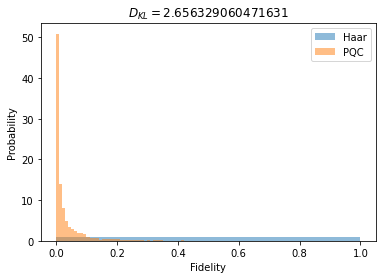

In [12]:
quple.circuit_fidelity_plot(cq, samples=3000, bins=100)

## Reproducing results from the paper page 5:
## https://arxiv.org/pdf/1905.10876.pdf

In [13]:
import sympy as sp
# circuit A
cq_A = quple.QuantumCircuit(n_qubit=1)
cq_A.H(0)
cq_A.RZ(sp.Symbol('x'),0)
cq_A

(0, 0): ───H───Rz(x)───

In [14]:
# circuit B
cq_B = quple.QuantumCircuit(n_qubit=1)
cq_B.H(0)
cq_B.RZ(sp.Symbol('x_0'),0)
cq_B.RX(sp.Symbol('x_1'),0)
cq_B

(0, 0): ───H───Rz(x_0)───Rx(x_1)───

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

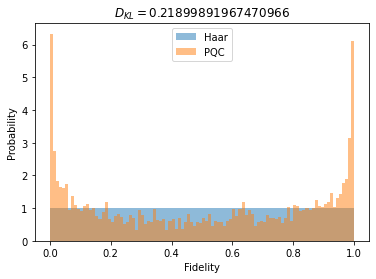

In [15]:
quple.circuit_fidelity_plot(cq_A, samples=3000, bins=100)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

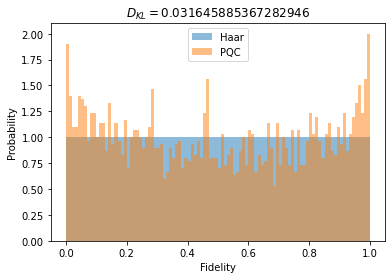

In [16]:
quple.circuit_fidelity_plot(cq_B, samples=3000, bins=100)

## Merging Parameterised Circuits

In [17]:
import quple
# Merging multiple parameterised circuit
# Sometimes you want to create a very customized parameterised circuit which cannot be created from a single 
# ParametereisedCircuit class but can be created from combining mutliple instances with a different construction
# If you simple append the circuits the parameters will not get updated
# This feature will upate the parameters for you

In [18]:
# Create various parameterised circuit
cq_1 = quple.ParameterisedCircuit(n_qubit=3, rotation_blocks=['RX','RZ'], copies=1, entanglement_blocks=['CNOT'], final_rotation_layer=False)
cq_1

(0, 0): ───Rx(pi*<θ_0/pi>)───Rz(pi*<θ_3/pi>)───@───@───────
                                               │   │
(0, 1): ───Rx(pi*<θ_1/pi>)───Rz(pi*<θ_4/pi>)───X───┼───@───
                                                   │   │
(0, 2): ───Rx(pi*<θ_2/pi>)───Rz(pi*<θ_5/pi>)───────X───X───

In [19]:
cq_2 = quple.ParameterisedCircuit(n_qubit=3, rotation_blocks=['RX','RY','RZ'], copies=2, entanglement_blocks=['CNOT'], final_rotation_layer=False)
cq_2

(0, 0): ───Rx(pi*<θ_0/pi>)───Ry(pi*<θ_3/pi>)───Rz(pi*<θ_6/pi>)───@───@───────Rx(pi*<θ_9/pi>)────Ry(pi*<θ_12/pi>)───Rz(pi*<θ_15/pi>)───@───@───────
                                                                 │   │                                                                │   │
(0, 1): ───Rx(pi*<θ_1/pi>)───Ry(pi*<θ_4/pi>)───Rz(pi*<θ_7/pi>)───X───┼───@───Rx(pi*<θ_10/pi>)───Ry(pi*<θ_13/pi>)───Rz(pi*<θ_16/pi>)───X───┼───@───
                                                                     │   │                                                                │   │
(0, 2): ───Rx(pi*<θ_2/pi>)───Ry(pi*<θ_5/pi>)───Rz(pi*<θ_8/pi>)───────X───X───Rx(pi*<θ_11/pi>)───Ry(pi*<θ_14/pi>)───Rz(pi*<θ_17/pi>)───────X───X───

In [20]:
cq_3 = quple.ParameterisedCircuit(n_qubit=3, rotation_blocks=['RX','RY'], copies=1, final_rotation_layer=False)
cq_3

(0, 0): ───Rx(pi*<θ_0/pi>)───Ry(pi*<θ_3/pi>)───

(0, 1): ───Rx(pi*<θ_1/pi>)───Ry(pi*<θ_4/pi>)───

(0, 2): ───Rx(pi*<θ_2/pi>)───Ry(pi*<θ_5/pi>)───

In [21]:
combined_cq = quple.merge_pqc([cq_1,cq_2,cq_3])
combined_cq

(0, 0): ───Rx(pi*θ_0)───Rz(pi*θ_3)───@───@───────Rx(pi*θ_6)───Ry(pi*θ_9)────Rz(pi*θ_12)───@───@───────Rx(pi*θ_15)───Ry(pi*θ_18)───Rz(pi*θ_21)───@───@───────Rx(pi*θ_24)───Ry(pi*θ_27)───
                                     │   │                                                │   │                                                 │   │
(0, 1): ───Rx(pi*θ_1)───Rz(pi*θ_4)───X───┼───@───Rx(pi*θ_7)───Ry(pi*θ_10)───Rz(pi*θ_13)───X───┼───@───Rx(pi*θ_16)───Ry(pi*θ_19)───Rz(pi*θ_22)───X───┼───@───Rx(pi*θ_25)───Ry(pi*θ_28)───
                                         │   │                                                │   │                                                 │   │
(0, 2): ───Rx(pi*θ_2)───Rz(pi*θ_5)───────X───X───Rx(pi*θ_8)───Ry(pi*θ_11)───Rz(pi*θ_14)───────X───X───Rx(pi*θ_17)───Ry(pi*θ_20)───Rz(pi*θ_23)───────X───X───Rx(pi*θ_26)───Ry(pi*θ_29)───

## Some features for the QuantumCircuit class
- create circuit from cirq.Circuit
- display the symbols inside the circuit
- display the qubits insie the circuit
- get circuits with parameter symbols resolved

In [22]:
# create circuit from cirq.Circuit
import cirq
import numpy as np
import sympy as sp
qubits = cirq.GridQubit.rect(1, 5)
cq = cirq.Circuit()
symbols = sp.symarray('x',5)
cq.append([cirq.H(qubits[i]) for i in range(5)])
cq.append([cirq.rz(symbols[i]*sp.pi)(qubits[i]) for i in range(5)])

In [23]:
cq

(0, 0): ───H───Rz(pi*x_0)───

(0, 1): ───H───Rz(pi*x_1)───

(0, 2): ───H───Rz(pi*x_2)───

(0, 3): ───H───Rz(pi*x_3)───

(0, 4): ───H───Rz(pi*x_4)───

In [24]:
# convert the circuit to a QuantumCircuit instance in quple
converted_cq = quple.QuantumCircuit.from_cirq(cq)
type(converted_cq)

quple.circuit.quantum_circuit.QuantumCircuit

In [25]:
# display the symbols inside the circuit
converted_cq.symbols

['x_0', 'x_1', 'x_2', 'x_3', 'x_4']

In [26]:
# display the qubits involved in the circuit
converted_cq.qubits

[cirq.GridQubit(0, 0),
 cirq.GridQubit(0, 1),
 cirq.GridQubit(0, 2),
 cirq.GridQubit(0, 3),
 cirq.GridQubit(0, 4)]

In [27]:
# get circuits with parameter symbols resolved
# first generated some random data
data = np.random.rand(5,5)
data

array([[0.13394046, 0.25688078, 0.595024  , 0.56326483, 0.93177573],
       [0.72320296, 0.76728155, 0.98925466, 0.9741367 , 0.57215725],
       [0.06722652, 0.02374716, 0.97782283, 0.1488589 , 0.56132834],
       [0.72969989, 0.13612395, 0.23433012, 0.26690133, 0.48748386],
       [0.46787894, 0.80124791, 0.02647172, 0.80916254, 0.67399644]])

In [28]:
# get the resolved circuits
resolved_circuits = converted_cq.resolve_parameters(data)

In [29]:
resolved_circuits[0]

(0, 0): ───H───Rz(0.134π)───

(0, 1): ───H───Rz(0.257π)───

(0, 2): ───H───Rz(0.595π)───

(0, 3): ───H───Rz(0.563π)───

(0, 4): ───H───Rz(0.932π)───

# New Encoding Maps
- self_product (default)
- cosine_product
- modified_cosine_product
- distance_measure
- one_norm_distance
- two_norm_distance
- arithmetic_mean

Encoding maps are used to encode parameters as rotation angles in an encoding circuit

In [30]:
# prepare the symbols
symbols = sp.symarray('x',5)
symbols

array([x_0, x_1, x_2, x_3, x_4], dtype=object)

In [31]:
# self_product encoding map
# from https://arxiv.org/pdf/1906.10467.pdf
from quple.data_encoding.encoding_maps import self_product
encoded_value = self_product(symbols)
encoded_value

x_0*x_1*x_2*x_3*x_4

In [32]:
symbols

array([x_0, x_1, x_2, x_3, x_4], dtype=object)

In [33]:
# cosine_product encoding map
from quple.data_encoding.encoding_maps import cosine_product
encoded_value = cosine_product(symbols)
encoded_value

cos(pi*(x_0/2 + 1/2))*cos(pi*(x_1/2 + 1/2))*cos(pi*(x_2/2 + 1/2))*cos(pi*(x_3/2 + 1/2))*cos(pi*(x_4/2 + 1/2))

In [34]:
# modified_cosine_product encoding map
# from https://arxiv.org/pdf/1906.10467.pdf
from quple.data_encoding.encoding_maps import modified_cosine_product
encoded_value = modified_cosine_product(symbols)
encoded_value

cos(x_0)*cos(x_1)*cos(x_2)*cos(x_3)*cos(x_4)

In [35]:
# distance_measure encoding map
from quple.data_encoding.encoding_maps import distance_measure
encoded_value = distance_measure(symbols)
encoded_value

(-x_0 + x_4)*(x_0 - x_1)*(x_1 - x_2)*(x_2 - x_3)*(x_3 - x_4)/32

In [36]:
# one_norm_distance encoding map
from quple.data_encoding.encoding_maps import one_norm_distance
encoded_value = one_norm_distance(symbols)
encoded_value

Abs(x_0 - x_1)/10 + Abs(x_0 - x_4)/10 + Abs(x_1 - x_2)/10 + Abs(x_2 - x_3)/10 + Abs(x_3 - x_4)/10

In [37]:
# two_norm_distance encoding map
from quple.data_encoding.encoding_maps import two_norm_distance
encoded_value = two_norm_distance(symbols)
encoded_value

0.447213595499958*((-x_0 + x_4)**2 + (x_0 - x_1)**2 + (x_1 - x_2)**2 + (x_2 - x_3)**2 + (x_3 - x_4)**2)**0.5

In [38]:
# arithmetic_mean encoding map
from quple.data_encoding.encoding_maps import arithmetic_mean
encoded_value = arithmetic_mean(symbols)
encoded_value

x_0/5 + x_1/5 + x_2/5 + x_3/5 + x_4/5

In [39]:
# Let's try out a second order expansion encoding circuit with the various encoding maps
from quple.data_encoding.second_order_expansion import SecondOrderExpansion

In [40]:
# self_product
cq = SecondOrderExpansion(feature_dimension=5, encoding_map=self_product)
cq

┌──┐                                                         ┌─────────────────────┐                                      ┌──┐                          ┌─────────────────────┐                                                                                                                                                          ┌──┐                                                         ┌─────────────────────┐                                      ┌──┐                          ┌─────────────────────┐
(0, 0): ───H───Rz(pi*<1.0*x_0>)───@──────────────────────────@───@──────────────────────────@────@────────────────────────────@───@───────────────────────────@─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────H───Rz(pi*<1.0*x_0>)───@──────────────────────────@───@──────────────────────────@────@────────────────────────────@───@───────────────────────────@─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                  │                          │   │                          │    │                            │   │                           │                                                                                                                                                                                                            │                          │   │                          │    │                            │   │                           │
(0, 1): ───H───Rz(pi*<1.0*x_1>)───X───Rz(pi*<1.0*x_0*x_1>)───X───┼──────────────────────────┼────┼@───────────────────────────┼───┼───────────────────────────┼────────────────────────@───@──────────────────────────@────@─────────────────────────────@──────────────────────────────────────────────────────────────────────────────────────────H───Rz(pi*<1.0*x_1>)───X───Rz(pi*<1.0*x_0*x_1>)───X───┼──────────────────────────┼────┼@───────────────────────────┼───┼───────────────────────────┼────────────────────────@───@──────────────────────────@────@─────────────────────────────@──────────────────────────────────────────────────────────────────────────────────────────
                                                                 │                          │    ││                           │   │                           │                        │   │                          │    │                             │                                                                                                                                                │                          │    ││                           │   │                           │                        │   │                          │    │                             │
(0, 2): ───H───Rz(pi*<1.0*x_2>)──────────────────────────────────X───Rz(pi*<1.0*x_0*x_2>)───X────┼X───────────────────────────┼───┼───────────────────────────┼Rz(pi*<1.0*x_1*x_2>)────X───┼──────────────────────────┼────┼@────────────────────────────┼────────────────────────@───@──────────────────────────@──────────────────────────────────H───Rz(pi*<1.0*x_2>)──────────────────────────────────X───Rz(pi*<1.0*x_0*x_2>)───X────┼X───────────────────────────┼───┼───────────────────────────┼Rz(pi*<1.0*x_1*x_2>)────X───┼──────────────────────────┼────┼@────────────────────────────┼────────────────────────@───@──────────────────────────@──────────────────────────────────
                                                                                                 │                            │   │                           │                            │                          │    ││                            │                        │   │                          │                                                                                                              

In [41]:
# cosine_product
cq = SecondOrderExpansion(feature_dimension=5, encoding_map=cosine_product)
cq

┌──┐                                                                                                                                 ┌─────────────────────────────────────────────────────────┐                                                                          ┌──┐                                                              ┌─────────────────────────────────────────────────────────┐                                                                                                                                                                                                                                                                                                                            ┌──┐                                                                                                                                 ┌─────────────────────────────────────────────────────────┐                                                                          ┌──┐                                                              ┌─────────────────────────────────────────────────────────┐
(0, 0): ───H───Rz(pi*<1.0*cos(pi*(x_0/2 + 1/2))>)───@──────────────────────────────────────────────────────────────@───@──────────────────────────────────────────────────────────────@────@────────────────────────────────────────────────────────────────@───@───────────────────────────────────────────────────────────────@─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────H───Rz(pi*<1.0*cos(pi*(x_0/2 + 1/2))>)───@──────────────────────────────────────────────────────────────@───@──────────────────────────────────────────────────────────────@────@────────────────────────────────────────────────────────────────@───@───────────────────────────────────────────────────────────────@─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                                    │                                                              │   │                                                              │    │                                                                │   │                                                               │                                                                                                                                                                                                                                                                                                                                                                                                                                                      │                                                              │   │                                                              │    │                                                                │   │                                                               │
(0, 1): ───H───Rz(pi*<1.0*cos(pi*(x_1/2 + 1/2))>)───X───Rz(pi*<1.0*cos(pi*(x_0/2 + 1/2))*cos(pi*(x_1/2 + 1/2))>)───X───┼──────────────────────────────────────────────────────────────┼────┼@───────────────────────────────────────────────────────────────┼───┼───────────────────────────────────────────────────────────────┼────────────────────────────────────────────────────────────@───@────────────────────────────────────────────────────────────

In [42]:
# modified_cosine_product
cq = SecondOrderExpansion(feature_dimension=5, encoding_map=modified_cosine_product)
cq

┌──┐                                                                             ┌───────────────────────────────┐                                                ┌──┐                                    ┌───────────────────────────────┐                                                                                                                                                                                                       ┌──┐                                                                             ┌───────────────────────────────┐                                                ┌──┐                                    ┌───────────────────────────────┐
(0, 0): ───H───Rz(pi*<1.0*cos(x_0)>)───@────────────────────────────────────@───@────────────────────────────────────@────@──────────────────────────────────────@───@─────────────────────────────────────@─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────H───Rz(pi*<1.0*cos(x_0)>)───@────────────────────────────────────@───@────────────────────────────────────@────@──────────────────────────────────────@───@─────────────────────────────────────@─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                       │                                    │   │                                    │    │                                      │   │                                     │                                                                                                                                                                                                                                                                             │                                    │   │                                    │    │                                      │   │                                     │
(0, 1): ───H───Rz(pi*<1.0*cos(x_1)>)───X───Rz(pi*<1.0*cos(x_0)*cos(x_1)>)───X───┼────────────────────────────────────┼────┼@─────────────────────────────────────┼───┼─────────────────────────────────────┼──────────────────────────────────@───@────────────────────────────────────@────@───────────────────────────────────────@────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────H───Rz(pi*<1.0*cos(x_1)>)───X───Rz(pi*<1.0*cos(x_0)*cos(x_1)>)───X───┼────────────────────────────────────┼────┼@─────────────────────────────────────┼───┼─────────────────────────────────────┼──────────────────────────────────@───@────────────────────────────────────@────@───────────────────────────────────────@────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                                                                │                                    │    ││                                     │   │                                     │                                  │   │                                    │    │                                       │                                                                                                                                                                                             │                                    │    ││                                     │   │                                     │                                  │   │                                    │    │                                       │
(0, 2): ───H───Rz(pi*<1.0*cos(x_2)>)────────────────────────────────────────────X───Rz(pi*<1.0*cos(x_0)*cos(x_2)>)───X────┼X─────────────────────────────────────┼───┼─────

In [43]:
# distance_measure
cq = SecondOrderExpansion(feature_dimension=5, encoding_map=distance_measure)
cq

┌──┐                                                                     ┌───────────────────────────┐                                            ┌──┐                                ┌───────────────────────────┐                                                                                                                                                                                  ┌──┐                                                                     ┌───────────────────────────┐                                            ┌──┐                                ┌───────────────────────────┐
(0, 0): ───H───Rz(pi*<1.0*x_0>)───@────────────────────────────────@───@────────────────────────────────@────@──────────────────────────────────@───@─────────────────────────────────@─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────H───Rz(pi*<1.0*x_0>)───@────────────────────────────────@───@────────────────────────────────@────@──────────────────────────────────@───@─────────────────────────────────@─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                  │                                │   │                                │    │                                  │   │                                 │                                                                                                                                                                                                                                                │                                │   │                                │    │                                  │   │                                 │
(0, 1): ───H───Rz(pi*<1.0*x_1>)───X───Rz(pi*<0.5*x_0 - 0.5*x_1>)───X───┼────────────────────────────────┼────┼@─────────────────────────────────┼───┼─────────────────────────────────┼──────────────────────────────@───@────────────────────────────────@────@───────────────────────────────────@────────────────────────────────────────────────────────────────────────────────────────────────────────────H───Rz(pi*<1.0*x_1>)───X───Rz(pi*<0.5*x_0 - 0.5*x_1>)───X───┼────────────────────────────────┼────┼@─────────────────────────────────┼───┼─────────────────────────────────┼──────────────────────────────@───@────────────────────────────────@────@───────────────────────────────────@────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                                                       │                                │    ││                                 │   │                                 │                              │   │                                │    │                                   │                                                                                                                                                                        │                                │    ││                                 │   │                                 │                              │   │                                │    │                                   │
(0, 2): ───H───Rz(pi*<1.0*x_2>)────────────────────────────────────────X───Rz(pi*<0.5*x_0 - 0.5*x_2>)───X────┼X─────────────────────────────────┼───┼─────────────────────────────────┼Rz(pi*<0.5*x_1 - 0.5*x_2>)────X───┼────────────────────────────────┼────┼@──────────────────────────────────┼──────────────────────────────@───@────────────────────────────────@────────────────────────────────────────H───Rz(pi*<1.0*x_2>)────────────────────────────────────────X───Rz(pi*<0.5*x_0 - 0.5*x_2>)───X────┼X─────────────────────────────────┼───┼──────────────────────────

In [44]:
# one_norm_distance
cq = SecondOrderExpansion(feature_dimension=5, encoding_map=one_norm_distance)
cq

┌──┐                                                                       ┌────────────────────────────┐                                             ┌──┐                                 ┌────────────────────────────┐                                                                                                                                                                                      ┌──┐                                                                       ┌────────────────────────────┐                                             ┌──┐                                 ┌────────────────────────────┐
(0, 0): ───H───Rz(pi*<1.0*x_0>)───@─────────────────────────────────@───@─────────────────────────────────@────@───────────────────────────────────@───@──────────────────────────────────@───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────H───Rz(pi*<1.0*x_0>)───@─────────────────────────────────@───@─────────────────────────────────@────@───────────────────────────────────@───@──────────────────────────────────@───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                  │                                 │   │                                 │    │                                   │   │                                  │                                                                                                                                                                                                                                                      │                                 │   │                                 │    │                                   │   │                                  │
(0, 1): ───H───Rz(pi*<1.0*x_1>)───X───Rz(pi*<1.0*Abs(x_0 - x_1)>)───X───┼─────────────────────────────────┼────┼@──────────────────────────────────┼───┼──────────────────────────────────┼───────────────────────────────@───@─────────────────────────────────@────@────────────────────────────────────@───────────────────────────────────────────────────────────────────────────────────────────────────────────────H───Rz(pi*<1.0*x_1>)───X───Rz(pi*<1.0*Abs(x_0 - x_1)>)───X───┼─────────────────────────────────┼────┼@──────────────────────────────────┼───┼──────────────────────────────────┼───────────────────────────────@───@─────────────────────────────────@────@────────────────────────────────────@───────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                                                        │                                 │    ││                                  │   │                                  │                               │   │                                 │    │                                    │                                                                                                                                                                            │                                 │    ││                                  │   │                                  │                               │   │                                 │    │                                    │
(0, 2): ───H───Rz(pi*<1.0*x_2>)─────────────────────────────────────────X───Rz(pi*<1.0*Abs(x_0 - x_2)>)───X────┼X──────────────────────────────────┼───┼──────────────────────────────────┼Rz(pi*<1.0*Abs(x_1 - x_2)>)────X───┼─────────────────────────────────┼────┼@───────────────────────────────────┼───────────────────────────────@───@─────────────────────────────────@─────────────────────────────────────────H───Rz(pi*<1.0*x_2>)─────────────────────────────────────────X───Rz

In [45]:
# one_norm_distance
cq = SecondOrderExpansion(feature_dimension=5, encoding_map=one_norm_distance)
cq

┌──┐                                                                       ┌────────────────────────────┐                                             ┌──┐                                 ┌────────────────────────────┐                                                                                                                                                                                      ┌──┐                                                                       ┌────────────────────────────┐                                             ┌──┐                                 ┌────────────────────────────┐
(0, 0): ───H───Rz(pi*<1.0*x_0>)───@─────────────────────────────────@───@─────────────────────────────────@────@───────────────────────────────────@───@──────────────────────────────────@───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────H───Rz(pi*<1.0*x_0>)───@─────────────────────────────────@───@─────────────────────────────────@────@───────────────────────────────────@───@──────────────────────────────────@───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                  │                                 │   │                                 │    │                                   │   │                                  │                                                                                                                                                                                                                                                      │                                 │   │                                 │    │                                   │   │                                  │
(0, 1): ───H───Rz(pi*<1.0*x_1>)───X───Rz(pi*<1.0*Abs(x_0 - x_1)>)───X───┼─────────────────────────────────┼────┼@──────────────────────────────────┼───┼──────────────────────────────────┼───────────────────────────────@───@─────────────────────────────────@────@────────────────────────────────────@───────────────────────────────────────────────────────────────────────────────────────────────────────────────H───Rz(pi*<1.0*x_1>)───X───Rz(pi*<1.0*Abs(x_0 - x_1)>)───X───┼─────────────────────────────────┼────┼@──────────────────────────────────┼───┼──────────────────────────────────┼───────────────────────────────@───@─────────────────────────────────@────@────────────────────────────────────@───────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                                                        │                                 │    ││                                  │   │                                  │                               │   │                                 │    │                                    │                                                                                                                                                                            │                                 │    ││                                  │   │                                  │                               │   │                                 │    │                                    │
(0, 2): ───H───Rz(pi*<1.0*x_2>)─────────────────────────────────────────X───Rz(pi*<1.0*Abs(x_0 - x_2)>)───X────┼X──────────────────────────────────┼───┼──────────────────────────────────┼Rz(pi*<1.0*Abs(x_1 - x_2)>)────X───┼─────────────────────────────────┼────┼@───────────────────────────────────┼───────────────────────────────@───@─────────────────────────────────@─────────────────────────────────────────H───Rz(pi*<1.0*x_2>)─────────────────────────────────────────X───Rz

In [46]:
# two_norm_distance
cq = SecondOrderExpansion(feature_dimension=5, encoding_map=two_norm_distance)
cq

┌──┐                                                                       ┌────────────────────────────┐                                             ┌──┐                                 ┌────────────────────────────┐                                                                                                                                                                                      ┌──┐                                                                       ┌────────────────────────────┐                                             ┌──┐                                 ┌────────────────────────────┐
(0, 0): ───H───Rz(pi*<1.0*x_0>)───@─────────────────────────────────@───@─────────────────────────────────@────@───────────────────────────────────@───@──────────────────────────────────@───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────H───Rz(pi*<1.0*x_0>)───@─────────────────────────────────@───@─────────────────────────────────@────@───────────────────────────────────@───@──────────────────────────────────@───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                  │                                 │   │                                 │    │                                   │   │                                  │                                                                                                                                                                                                                                                      │                                 │   │                                 │    │                                   │   │                                  │
(0, 1): ───H───Rz(pi*<1.0*x_1>)───X───Rz(pi*<1.0*Abs(x_0 - x_1)>)───X───┼─────────────────────────────────┼────┼@──────────────────────────────────┼───┼──────────────────────────────────┼───────────────────────────────@───@─────────────────────────────────@────@────────────────────────────────────@───────────────────────────────────────────────────────────────────────────────────────────────────────────────H───Rz(pi*<1.0*x_1>)───X───Rz(pi*<1.0*Abs(x_0 - x_1)>)───X───┼─────────────────────────────────┼────┼@──────────────────────────────────┼───┼──────────────────────────────────┼───────────────────────────────@───@─────────────────────────────────@────@────────────────────────────────────@───────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                                                        │                                 │    ││                                  │   │                                  │                               │   │                                 │    │                                    │                                                                                                                                                                            │                                 │    ││                                  │   │                                  │                               │   │                                 │    │                                    │
(0, 2): ───H───Rz(pi*<1.0*x_2>)─────────────────────────────────────────X───Rz(pi*<1.0*Abs(x_0 - x_2)>)───X────┼X──────────────────────────────────┼───┼──────────────────────────────────┼Rz(pi*<1.0*Abs(x_1 - x_2)>)────X───┼─────────────────────────────────┼────┼@───────────────────────────────────┼───────────────────────────────@───@─────────────────────────────────@─────────────────────────────────────────H───Rz(pi*<1.0*x_2>)─────────────────────────────────────────X───Rz

In [47]:
# arithmetic_mean
cq = SecondOrderExpansion(feature_dimension=5, encoding_map=arithmetic_mean)
cq

┌──┐                                                                     ┌───────────────────────────┐                                            ┌──┐                                ┌───────────────────────────┐                                                                                                                                                                                  ┌──┐                                                                     ┌───────────────────────────┐                                            ┌──┐                                ┌───────────────────────────┐
(0, 0): ───H───Rz(pi*<1.0*x_0>)───@────────────────────────────────@───@────────────────────────────────@────@──────────────────────────────────@───@─────────────────────────────────@─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────H───Rz(pi*<1.0*x_0>)───@────────────────────────────────@───@────────────────────────────────@────@──────────────────────────────────@───@─────────────────────────────────@─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                  │                                │   │                                │    │                                  │   │                                 │                                                                                                                                                                                                                                                │                                │   │                                │    │                                  │   │                                 │
(0, 1): ───H───Rz(pi*<1.0*x_1>)───X───Rz(pi*<0.5*x_0 + 0.5*x_1>)───X───┼────────────────────────────────┼────┼@─────────────────────────────────┼───┼─────────────────────────────────┼──────────────────────────────@───@────────────────────────────────@────@───────────────────────────────────@────────────────────────────────────────────────────────────────────────────────────────────────────────────H───Rz(pi*<1.0*x_1>)───X───Rz(pi*<0.5*x_0 + 0.5*x_1>)───X───┼────────────────────────────────┼────┼@─────────────────────────────────┼───┼─────────────────────────────────┼──────────────────────────────@───@────────────────────────────────@────@───────────────────────────────────@────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                                                       │                                │    ││                                 │   │                                 │                              │   │                                │    │                                   │                                                                                                                                                                        │                                │    ││                                 │   │                                 │                              │   │                                │    │                                   │
(0, 2): ───H───Rz(pi*<1.0*x_2>)────────────────────────────────────────X───Rz(pi*<0.5*x_0 + 0.5*x_2>)───X────┼X─────────────────────────────────┼───┼─────────────────────────────────┼Rz(pi*<0.5*x_1 + 0.5*x_2>)────X───┼────────────────────────────────┼────┼@──────────────────────────────────┼──────────────────────────────@───@────────────────────────────────@────────────────────────────────────────H───Rz(pi*<1.0*x_2>)────────────────────────────────────────X───Rz(pi*<0.5*x_0 + 0.5*x_2>)───X────┼X─────────────────────────────────┼───┼──────────────────────────

# Data Preparation
- train_val_test_split
- prepare_train_val_test

In [48]:
# prepare some data
x = np.random.rand(10000, 10)*100*np.pi*np.random.rand()
x

array([[3.23256327, 3.07095593, 0.80156151, ..., 3.29841264, 1.08280521,
        1.59284806],
       [3.31902725, 1.3623888 , 2.45834907, ..., 1.21592775, 0.88477209,
        2.98119362],
       [1.27322491, 2.61826922, 2.46129949, ..., 3.72343571, 1.20031149,
        3.24753749],
       ...,
       [1.70647582, 0.7647443 , 1.96090395, ..., 1.08862288, 4.12835535,
        3.29633717],
       [4.47493865, 3.44792325, 3.9889888 , ..., 3.65675833, 3.07934762,
        0.04468127],
       [3.37187208, 0.04058764, 3.72593763, ..., 3.78445705, 0.99128789,
        3.27913496]])

In [49]:
y = np.random.choice([0.0, 1.0], 10000)
y

array([0., 0., 0., ..., 0., 1., 0.])

In [50]:
from quple.components.data_preparation import train_val_test_split
# split data into training, validation and test set with shuffling and random state = 1
x_train, x_val, x_test, y_train, y_val, y_test = train_val_test_split(x, y, train_size=1000, val_size=1000, test_size=1000, shuffle=True, random_state=1)

In [51]:
print('x_train:\n',x_train)
print('x_val:\n',x_val)
print('x_test:\n',x_test)
print('x_train_shape:\n',x_train.shape)
print('x_val.shape:\n',x_val.shape)
print('x_test.shape:\n',x_test.shape)

x_train:
 [[2.76499167 1.73160929 1.44806713 ... 2.39949841 1.81548737 0.77814711]
 [3.61905183 4.36935274 1.41880141 ... 1.39955311 1.7597854  1.00227901]
 [0.15468463 0.15741264 3.12449064 ... 3.44647553 3.66093326 1.77910173]
 ...
 [0.34097845 2.80109709 4.14773375 ... 3.45076591 4.19919538 2.42115572]
 [1.03199702 1.14568008 1.75460383 ... 0.04179489 3.47846774 2.68359486]
 [1.44601756 2.86422013 1.50914463 ... 3.45432247 1.2998436  3.48094834]]
x_val:
 [[1.38275022e+00 1.80093133e+00 2.47262128e-03 ... 4.33972080e+00
  4.03745998e-01 4.15572278e+00]
 [2.79649446e+00 4.23344606e+00 4.57973342e+00 ... 1.74876562e+00
  1.57135208e+00 9.07736187e-01]
 [2.00903413e+00 3.69187565e+00 7.23698432e-01 ... 3.04760836e+00
  2.23648108e+00 2.05035148e+00]
 ...
 [2.86815963e+00 3.70096725e+00 3.16385591e-01 ... 4.51318278e+00
  3.59924734e+00 2.84524181e+00]
 [1.69921014e+00 1.63820839e+00 2.52763548e+00 ... 4.55891702e+00
  3.52073102e+00 2.38337039e+00]
 [1.37785984e+00 1.55735579e+00 1.2043

In [52]:
# on top of train val test split, apply data preprocessing to the datasets

# prepare data preprocessors from sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
# Apply 3 data preprocessors
# 1. PCA to reduce the dimension to 5 to fit the 5 qubit circuit
# 2. StandardScaler to standardize features by removing the mean and scaling to unit variance
# 3. MinMaxScaler to bound the data in the range [-1,+1]
preprocessors = [PCA(n_components=5, random_state=3), StandardScaler(), MinMaxScaler((-1,1))]

In [53]:
from quple.components.data_preparation import prepare_train_val_test
# obtain the train, val, test datasets with the preprocessors applied
x_train, x_val, x_test, y_train, y_val, y_test = prepare_train_val_test(x, y, train_size=1000, val_size=1000, test_size=1000, preprocessors=preprocessors, random_state=1)

In [54]:
print('x_train:\n',x_train)
print('x_val:\n',x_val)
print('x_test:\n',x_test)
print('x_train_shape:\n',x_train.shape)
print('x_val.shape:\n',x_val.shape)
print('x_test.shape:\n',x_test.shape)

x_train:
 [[-0.22903533  0.76530583  0.11228214  0.05861304 -0.25087383]
 [-0.16183911  0.59889758 -0.36246633 -0.07526878  0.15665632]
 [ 0.37047804 -0.09733564  0.72359533 -0.54993076 -0.59033846]
 ...
 [ 0.3964138  -0.59373236  0.54757738 -0.14411317  0.13539166]
 [ 0.52310259  0.10579607 -0.0030262  -0.3344043  -0.22013126]
 [-0.12807208  0.00260309 -0.17554471  0.70052865  0.00702368]]
x_val:
 [[-0.33913212 -1.00188967  0.03958756  0.02375258 -0.71573655]
 [-0.19569981 -0.20705849 -0.40566922 -0.13348197  0.35316324]
 [-0.16437679  0.16809716  0.26877567 -0.04758683 -0.01494893]
 ...
 [-0.29331132  0.08303611  0.31410493  0.08545098  0.24450038]
 [ 0.00148206  0.05342156  0.70128835  0.11697148 -0.13267673]
 [-0.20786903 -0.02255432  0.05006129  0.05392278  0.10957499]]
x_test:
 [[-0.30530934 -0.57595688  0.09040722 -0.11033139  0.25476833]
 [-0.54053573 -0.09886871 -0.27813553  0.22598081 -0.24409023]
 [-0.29260863 -0.10249668  0.56854392  0.04438359 -0.1735136 ]
 ...
 [-0.164418